# 강의내용

* 교재 5장 HFDP Ch5
* Singleton 패턴 (Creational Design Pattern)
* 프로그래밍 'Chocolate Factory' (HFDP Ch4)
* TOC
    * intro
    * problems
    * before
    * design
    * after
    * case implementation
    * exercise (by Sat to git: 50% for 1 day late deadline) 
        * case extension
            * ChocolateBoiler threadsafe
        * new case -  Printer spooler

# 1. Singleton 패턴


* Client - 객체를 1개만 생성
* 구분
    * eager initialization
        * the instance of Singleton Class is created at the time of class loading
        * 처음에 생성하므로 자원 소모.
        * exception handling하기 어려움.
        * p.181
        ```
    private static Singleton instance = new Singleton();
    private Singleton(){}
    public static Singleton getInstance(){
        return instance;
    }
    ```
    * lazy initialization
        * ```pulbic static Singleton getInstance()```
    * threadsafe
        * make the global access method synchronized, so that only one thread can execute this method at a time
        * ```public static synchronized Singleton getInstance()```
    * double checked locking (p.182)
        * thread-safety reduces the performance because of cost associated with the synchronized method
        * double checked locking principle
            * thread가 동시에 동일한 함수를 사용하지 못하게 함.
            * the synchronized block is used with 'if'문
            * 사용하는 thread는 잠금사용. 다른 thread가 사용하려면 대기. 
* cases
    * HFDP Chocolate Factory
    * thread
    * print pooler

* 디자인패턴 요소

요소 | 설명
---|---
name | Singleton
problem | 여러 객체가 생성되면 상태관리 어려움.
solution | 객체 생성자를 중앙 관리
consequence | 객체가 1개라서 일관된 상태

# 2. 문제

* 커피 바리스타가 많은 경우
     * 커피를 주문하고 오래 걸려서 다른 바리스타에게 '주문이 나오지 않았다'고 말하는 경우
     * 커피바리스타는 서로 확인하지 않고 커피를 만든다.
     * 고객이 여러 번 '커피가 나오지 않았다'고 확인할 때마다 커피를 만들면 문제
* 클래스에 대해 객체를 1개만 생성 해야 하는 상황.
    * 로그 logger, 프린트 spooler
* 독점의 문제? 사용 중 -> 오랫 동안 사용하면 문제

In [1]:
import os
import glob

mywd=%pwd
myplantdir=os.path.join(mywd,'lib')
mydotdir=!which dot
mydot=mydotdir[0]

%cd {myplantdir}
glob.glob(r'./*.jar')
os.environ['GRAPHVIZ_DOT']=mydot
!java -jar {myplantdir}/plantuml.jar -testdot

/Users/media/Code/git/sd/lib
The environment variable GRAPHVIZ_DOT has been set to /opt/local/bin/dot
Dot executable is /opt/local/bin/dot
Dot version: dot - graphviz version 2.38.0 (20140413.2041)
Installation seems OK. File generation OK


In [28]:
%install_ext https://raw.githubusercontent.com/sberke/ipython-plantuml/master/plantuml_magics.py

Installed plantuml_magics.py. To use it, type:
  %load_ext plantuml_magics


In [29]:
%load_ext plantuml_magics

# 3. before

* 고객이 '커피가 나오지 않았다'고 확인할 때마다, 커피바리스타가 주문이 실행되고 있는지 서로 확인하지 않고 커피를 만들면 문제
* 커피보일러 -> 초콜릿 보일러

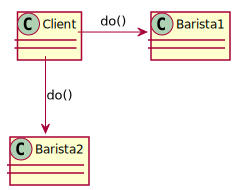

In [44]:
%%plantuml
@startuml
class Client

Client -right-> Barista1:do()
Client -down-> Barista2:do()
@enduml

# 4. 설계

* only one instance to provide a global point of access to it (p.177)
* static, private, if (p.173)
    * static -> 클래스변수에 instance를 저장하고 공유.
    * if 생성되어 있는지 확인 -> 생성되지 않는 경우만 생성.
    * private -> 직접사용불가 -> getInstance()를 이용해야 함.
* threadsafe

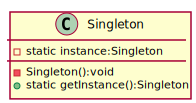

In [35]:
%%plantuml
@startuml
class Singleton {
    -static instance:Singleton
    -Singleton():void
    +static getInstance():Singleton
}
@enduml

# 5. after

* 교재 HFDP Ch5 'Chocolate Boiler'
* classic

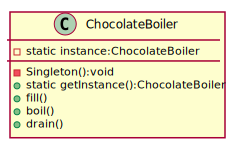

In [43]:
%%plantuml
@startuml
class ChocolateBoiler {
    -static instance:ChocolateBoiler
    -Singleton():void
    +static getInstance():ChocolateBoiler
    +fill()
    +boil()
    +drain()
}
@enduml

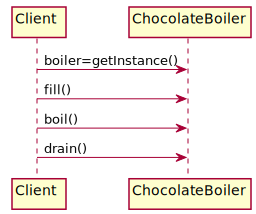

In [42]:
%%plantuml
@startuml
Client -> ChocolateBoiler:boiler=getInstance()
Client -> ChocolateBoiler:fill()
Client -> ChocolateBoiler:boil()
Client -> ChocolateBoiler:drain()
@enduml

In [ ]:
# %load ./src/headfirst/singleton/chocolate/ChocolateBoiler.java
package headfirst.singleton.chocolate;
 
public class ChocolateBoiler {
	private boolean empty;
	private boolean boiled;
	private static ChocolateBoiler uniqueInstance;
        private static int numCalled=0;   //20151025 jsl
  
	private ChocolateBoiler() {
		empty = true;
		boiled = false;
	}
  
	public static ChocolateBoiler getInstance() {
		if (uniqueInstance == null) {
			System.out.println("Creating unique instance of Chocolate Boiler");
			uniqueInstance = new ChocolateBoiler();
		}
		System.out.println("Returning instance of Chocolate Boiler");
		System.out.println("jsl: numCalled "+numCalled++);
		return uniqueInstance;
	}

	public void fill() {
		if (isEmpty()) {
			empty = false;
			boiled = false;
			// fill the boiler with a milk/chocolate mixture
		}
	}
 
	public void drain() {
		if (!isEmpty() && isBoiled()) {
			// drain the boiled milk and chocolate
			empty = true;
		}
	}
 
	public void boil() {
		if (!isEmpty() && !isBoiled()) {
			// bring the contents to a boil
			boiled = true;
		}
	}
  
	public boolean isEmpty() {
		return empty;
	}
 
	public boolean isBoiled() {
		return boiled;
	}
}


In [ ]:
# %load ./src/headfirst/singleton/chocolate/ChocolateController.java
package headfirst.singleton.chocolate;
 
public class ChocolateController {
	public static void main(String args[]) {
		ChocolateBoiler boiler = ChocolateBoiler.getInstance();
		boiler.fill();
		boiler.boil();
		boiler.drain();

		// will return the existing instance
		ChocolateBoiler boiler2 = ChocolateBoiler.getInstance();
	}
}


In [27]:
!javac -d classes/ -sourcepath src/ src/headfirst/singleton/chocolate/*.java
!java -cp classes/ headfirst.singleton.chocolate.ChocolateController

Creating unique instance of Chocolate Boiler
Returning instance of Chocolate Boiler
jsl: numCalled 0
Returning instance of Chocolate Boiler
jsl: numCalled 1


# 6. Case Implementation


* classic - no thread, lazy init
* stat - eager init
* thread - synchronized
    * multiple threads running - concurrency problem
    * 한 쓰레드가 파일에 쓰는 경우, 다른 쓰레드가 열고 쓰고 닫는 경우 데이터가 유실
* dcl - volatile
    * 동기화 - volatile 변수는 동기화된 결과를 공유
    * 파일에 쓰는 경우, 모든 쓰레드가 그 결과를 공유
* subclass - protected


## 6.1. classic

* instance를 private static으로 생성함.
    * private
        * public getInstacne()함수를 통하지 않고는 인스턴스를 만들 수 없슴.
    * static
        * 객체가 아닌 클래스 변수.
        * 객체를 생성한 횟수를 세거나, 상수를 선언해서 사용 (예: java.lang.Math PI, abs())
* lazy instantiation
    * 필요한 때 객체 생성

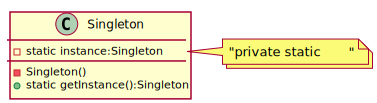

In [7]:
%%plantuml
@startuml

class Singleton {
    -static instance:Singleton
    -Singleton()
    +static getInstance():Singleton
}
note right
"""private static"""
end note
@enduml

In [ ]:
# %load ./src/headfirst/singleton/classic/Singleton.java
package headfirst.singleton.classic;

public class Singleton {
	private static Singleton uniqueInstance;
    private static int numCalled=0;
	private Singleton() {}
 
	public static Singleton getInstance() {
		if (uniqueInstance == null) {
			uniqueInstance = new Singleton();
		}
                System.out.println("numCalled: "+numCalled++);
		return uniqueInstance;
	}
}


In [ ]:
# %load ./src/headfirst/singleton/classic/SingletonMain.java
/*
 * @author jsl
 * @version 20151025
 * copied from stat/SingletonClient.java
 */
package headfirst.singleton.classic;

public class SingletonMain {
	public static void main(String[] args) {
		Singleton singleton1 = Singleton.getInstance();
		Singleton singleton2 = Singleton.getInstance();
		Singleton singleton3 = Singleton.getInstance();
	}
}


In [9]:
!javac -d classes/ -sourcepath src/ src/headfirst/singleton/classic/*.java
!java -cp classes/ headfirst.singleton.classic.SingletonMain

numCalled: 0
numCalled: 1
numCalled: 2


## 6.2 eager instantiation

* Singleton객체 생성하는 시점을 생성자에서.
* 6.1과 class diagram동일.

In [ ]:
# %load ./src/headfirst/singleton/stat/Singleton.java
package headfirst.singleton.stat;

public class Singleton {
    private static Singleton uniqueInstance = new Singleton();
    private static int numCalled=0;
 
    private Singleton() {}
 
    public static Singleton getInstance() {
        System.out.println("num of called: "+numCalled++);
        return uniqueInstance;
    }
}


In [ ]:
# %load ./src/headfirst/singleton/stat/SingletonClient.java
package headfirst.singleton.stat;

public class SingletonClient {
    public static void main(String[] args) {
            Singleton singleton1 = Singleton.getInstance();
            Singleton singleton2 = Singleton.getInstance();
    }
}


In [12]:
!javac -d classes/ -sourcepath src/ src/headfirst/singleton/stat/*.java
!java -cp classes/ headfirst.singleton.stat.SingletonClient

num of called: 0
num of called: 1


## 6.3 thread

* 5.1과 동일하지만 thread safe.
* Synchronized


In [ ]:
# %load ./src/headfirst/singleton/threadsafe/Singleton.java
package headfirst.singleton.threadsafe;

public class Singleton {
    private static Singleton uniqueInstance;
    private static int numCalled=0;
    private Singleton() {}
 
    public static synchronized Singleton getInstance() {
        if (uniqueInstance == null) {
            uniqueInstance = new Singleton();
        }
        System.out.println("numCalled: "+numCalled++);
        return uniqueInstance;
    }
}


In [ ]:
# %load ./src/headfirst/singleton/threadsafe/SingletonMain.java

package headfirst.singleton.threadsafe;

public class SingletonMain {
    public static void main(String[] args) {
        Singleton singleton1 = Singleton.getInstance();
        Singleton singleton2 = Singleton.getInstance();
        Singleton singleton3 = Singleton.getInstance();
    }
}


In [15]:
!javac -d classes/ -sourcepath src/ src/headfirst/singleton/threadsafe/*.java
!java -cp classes/ headfirst.singleton.threadsafe.SingletonMain

numCalled: 0
numCalled: 1
numCalled: 2


## 6.4 dcl

* volatile


In [ ]:
# %load ./src/headfirst/singleton/dcl/Singleton.java
package headfirst.singleton.dcl;

//
// Danger!  This implementation of Singleton not
// guaranteed to work prior to Java 5
//

public class Singleton {
    private volatile static Singleton uniqueInstance;
    private static int numCalled=0;
 
    private Singleton() {}

    public static Singleton getInstance() {
        if (uniqueInstance == null) {
            synchronized (Singleton.class) {
                if (uniqueInstance == null) {
                    uniqueInstance = new Singleton();
                }
            }
        }
        System.out.println("numCalled: "+numCalled++);
        return uniqueInstance;
    }
}


In [ ]:
# %load ./src/headfirst/singleton/dcl/SingletonClient.java
package headfirst.singleton.dcl;

public class SingletonClient {
    public static void main(String[] args) {
            Singleton singleton1 = Singleton.getInstance();
            Singleton singleton2 = Singleton.getInstance();
    }
}


In [19]:
!javac -d classes/ -sourcepath src/ src/headfirst/singleton/dcl/*.java
!java -cp classes/ headfirst.singleton.dcl.SingletonClient

numCalled: 0
numCalled: 1


## 6.5 subclass

* 상속인 경우의 singleton

In [ ]:
# %load ./src/headfirst/singleton/subclass/Singleton.java
package headfirst.singleton.subclass;

public class Singleton {
	protected static Singleton uniqueInstance;
 
	// other useful instance variables here
 
	protected Singleton() {}
 
	public static synchronized Singleton getInstance() {
		if (uniqueInstance == null) {
			uniqueInstance = new Singleton();
		}
		return uniqueInstance;
	}
 
	// other useful methods here
}


In [ ]:
# %load ./src/headfirst/singleton/subclass/CoolerSingleton.java
package headfirst.singleton.subclass;

public class CoolerSingleton extends Singleton {
	// useful instance variables here
	protected static Singleton uniqueInstance;
 
	private CoolerSingleton() {
		super();
	}
 
	// useful methods here
}


In [ ]:
# %load ./src/headfirst/singleton/subclass/HotterSingleton.java
package headfirst.singleton.subclass;

public class HotterSingleton extends Singleton {
	// useful instance variables here
 
	private HotterSingleton() {
		super();
	}
 
	// useful methods here
}


In [ ]:
# %load ./src/headfirst/singleton/subclass/SingletonTestDrive.java
package headfirst.singleton.subclass;

public class SingletonTestDrive {
	public static void main(String[] args) {
		Singleton foo = CoolerSingleton.getInstance();
		Singleton bar = HotterSingleton.getInstance();
		System.out.println(foo);
		System.out.println(bar);
 	}
}


In [24]:
!javac -d classes/ -sourcepath src/ src/headfirst/singleton/subclass/*.java
!java -cp classes/ headfirst.singleton.subclass.SingletonTestDrive

headfirst.singleton.subclass.Singleton@5984cf08
headfirst.singleton.subclass.Singleton@5984cf08
